## Finite Difference For Parabolic Problems

In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
from math import exp

from matplotlib import animation, rc
from IPython.display import HTML

### Example 1 - One Dimensional Homogeneous Heat Equation

Here we show how to solve the following elliptic ordinary differential equation:
$$\begin{cases}\partial_t u - \partial^2_x u = 0\\u(-1)=0\;\;u(1)=0\\
u(x,0) = u_0(x)\end{cases}$$

we first define the 1D geometry where we are going to solve the problem, then we generate a uniform mesh for the finite difference scheme.

In [3]:
I = line(-1.0,1.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.25)

we now define the initial data over the above constructed mesh, and draw it,
$$u_0(x) = (x^2-1)$$

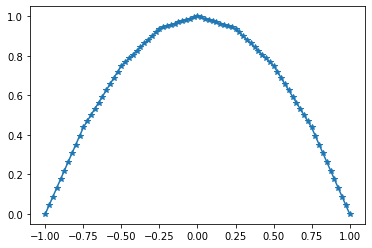

In [4]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda P: [(-P[0]**2+1)])
u0_vec = u0.vec_export()
Draw(u0,mesh,1)

We then create an spatial approximation of the Laplace operator with Dirichlet boundary conditions and use this to generate the stiffness matrix $K$, then we construct the mass matrix $M$.

In [5]:
bc = BoundaryCondition("DIRICHLET",u0)
FD = FiniteDifference(mesh)
K = FD.LaplaceOp(bc)+FD.BoundaryOp(bc);
M = spmat(K.Width(),K.Height())
N = spmat(K.Width(),K.Height())
N.empty()

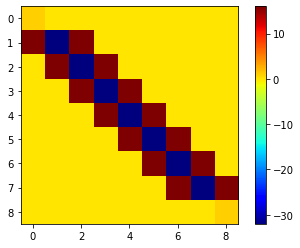

In [6]:
plt.imshow(spmat2npmat(K),cmap="jet")
plt.colorbar()

Now we use the forward Euler method to solve the systems of ODEs represented by the following same discrete equations:
$$M\vec{U}'(t)-K\vec{U}(t) = 0$$

In [7]:
DiffEq = LinearODEs(1);
DiffEq.setDomain(0,4.0)
DiffEq.setSolver("JACOBI",500);
DiffEq

Linear ODE of 1-th order defined on the interval (0.000000,4.000000)

In [8]:
DiffEq.setCoeff(0,lambda t : N);
DiffEq.setCoeff(1,lambda t : (-1)*K);
DiffEq.setCoeff(2,lambda t : M);
DiffEq.setIC([u0_vec])
u0_vec

(0.000000,0.437500,0.750000,0.937500,1.000000,0.937500,0.750000,0.437500,0.000000)

In [9]:
[H, u] = DiffEq.Euler(0.01)

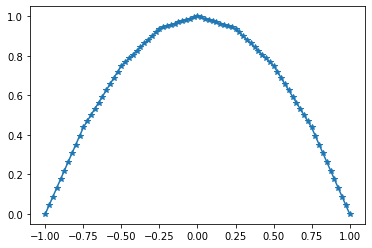

In [10]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[0])
Draw(ut,mesh,1)

In [11]:
u[-1].norm(2)

0.00011002561597204285

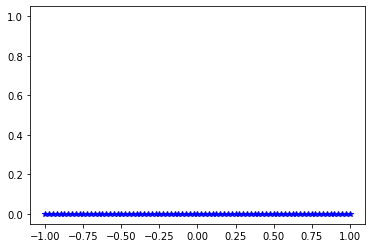

In [12]:
fig = plt.figure()
ims = []
for i in range(len(H)):
    ut.vec_import(u[i])
    ims.append(Figure(ut,mesh,1,"b*-"))

anim = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=1000);
HTML(anim.to_html5_video())

### Example 2 - One Dimensional Homogeneous Heat Equation

Here we show how to solve the following elliptic ordinary differential equation:
$$\begin{cases}\partial_t u - \partial^2_x u = 0\\u(-1)=0\;\;u(1)=0\\
u(x,0) = u_0(x)\end{cases}$$

we first define the 1D geometry where we are going to solve the problem, then we generate a uniform mesh for the finite difference scheme.

In [13]:
I = line(-4.0,4.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.25)

we now define the initial data over the above constructed mesh, and draw it,
$$u_0(x) = (x^2-1)$$

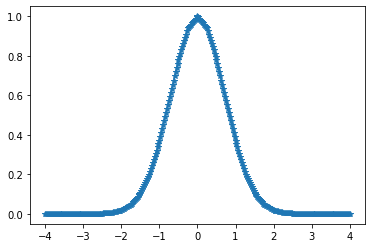

In [14]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda P: [exp(-((P[0])**2))])
u0_vec = u0.vec_export()
Draw(u0,mesh,1)

We then create an spatial approximation of the Laplace operator with Dirichlet boundary conditions and use this to generate the stiffness matrix $K$, then we construct the mass matrix $M$.

In [15]:
bc = BoundaryCondition("DIRICHLET",u0)
FD = FiniteDifference(mesh)
K = FD.LaplaceOp(bc)+FD.BoundaryOp(bc);
M = spmat(K.Width(),K.Height())
N = spmat(K.Width(),K.Height())
N.empty()

Now we use the forward Euler method to solve the systems of ODEs represented by the following same discrete equations:
$$M\vec{U}'(t)-K\vec{U}(t) = 0$$

In [16]:
DiffEq = LinearODEs(1);
DiffEq.setDomain(0,4.0)
DiffEq.setSolver("JACOBI",500);
DiffEq

Linear ODE of 1-th order defined on the interval (0.000000,4.000000)

In [17]:
DiffEq.setCoeff(0,lambda t : N);
DiffEq.setCoeff(1,lambda t : (-1)*K);
DiffEq.setCoeff(2,lambda t : M);
DiffEq.setIC([u0_vec])
u0_vec

(0.000000,0.000001,0.000005,0.000026,0.000123,0.000520,0.001930,0.006330,0.018316,0.046771,0.105399,0.209611,0.367879,0.569783,0.778801,0.939413,1.000000,0.939413,0.778801,0.569783,0.367879,0.209611,0.105399,0.046771,0.018316,0.006330,0.001930,0.000520,0.000123,0.000026,0.000005,0.000001,0.000000)

In [18]:
[H, u] = DiffEq.Euler(0.01)

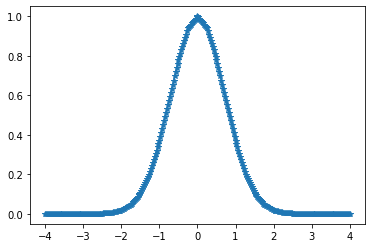

In [19]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[0])
Draw(ut,mesh,1)

In [20]:
u[-1].norm(2)

0.9217716127186378

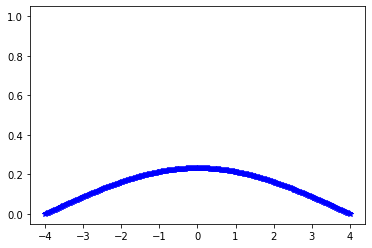

In [21]:
fig = plt.figure()
ims = []
for i in range(len(H)):
    ut.vec_import(u[i])
    ims.append(Figure(ut,mesh,1,"b*-"))

anim = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=1000);
HTML(anim.to_html5_video())

### Example 3 - One Dimensional Heat Equation

Here we show how to solve the following elliptic ordinary differential equation:
$$\begin{cases}\partial_t u - \partial^2_x u = 1\\u(-1)=0\;\;u(1)=0\\
u(x,0) = u_0(x)\end{cases}$$

we first define the 1D geometry where we are going to solve the problem, then we generate a uniform mesh for the finite difference scheme.

In [22]:
I = line(-1.0,1.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.25)

we now define the initial data over the above constructed mesh, and draw it,
$$u_0(x) = (x^2-1)$$

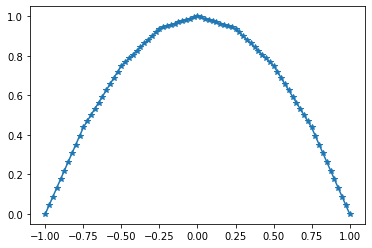

In [23]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda P: [(-P[0]**2+1)])
u0_vec = u0.vec_export()
Draw(u0,mesh,1)

We then create an spatial approximation of the Laplace operator with Dirichlet boundary conditions and use this to generate the stiffness matrix $K$, then we construct the mass matrix $M$.

In [24]:
bc = BoundaryCondition("DIRICHLET",u0)
FD = FiniteDifference(mesh)
K = FD.LaplaceOp(bc)+FD.BoundaryOp(bc);
M = spmat(K.Width(),K.Height())
N = spmat(K.Width(),K.Height())
N[1,1]= 0; N[K.Width(),K.Height()]=0;

Now we use the forward Euler method to solve the systems of ODEs represented by the following same discrete equations:
$$M\vec{U}'(t)-K\vec{U}(t) = \vec{1}$$

In [25]:
DiffEq = LinearODEs(1);
DiffEq.setDomain(0,4.0)
DiffEq.setSolver("JACOBI",500);
DiffEq

Linear ODE of 1-th order defined on the interval (0.000000,4.000000)

In [26]:
DiffEq.setCoeff(0,lambda t : N);
DiffEq.setCoeff(1,lambda t : (-1)*K);
DiffEq.setCoeff(2,lambda t : M);
DiffEq.setIC([u0_vec])
u0_vec

(0.000000,0.437500,0.750000,0.937500,1.000000,0.937500,0.750000,0.437500,0.000000)

In [27]:
[H, u] = DiffEq.Euler(0.01)

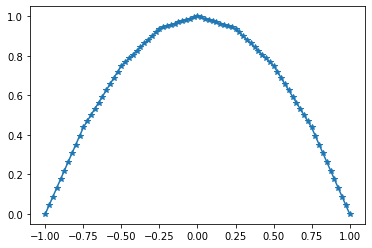

In [28]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[0])
Draw(ut,mesh,1)

In [29]:
u[-1].norm(2)

1.0327244518621164

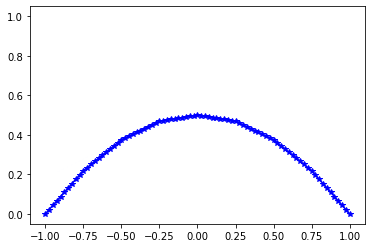

In [30]:
fig = plt.figure()
ims = []
for i in range(len(H)):
    ut.vec_import(u[i])
    ims.append(Figure(ut,mesh,1,"b*-"))

anim = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=1000);
HTML(anim.to_html5_video())

### Example 4 - Two Dimensional Homogeneous Heat Equation

We first define the geometry of the problem and the mesh.

In [3]:
import sys
sys.path.append('../../Py/Build')
from suite import *
import numpy as np
sys.path.append('../../Py/GUI')
from suiteGUI import *

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
mesh = Mesh(2);
mesh.UniformSqMesh([0.0,1.0,0.0,1.0],10);
Geo = Geometry(2);
def distSquare(P):
    """
    y2 -> *----------*
           |          |
           |          |
           |          |
    y1 -> *----------*
           ^          ^
           |x1        |x2
    """
    x1 = 0; x2 = 1; y1 = 0; y2=1;
    return max([P[0]-x2,x1-P[0],P[1]-y2,y1-P[1]])
Geo.add(distSquare)

11.0


/home/umberto/Dropbox/Maths/Numerica/KAUST/Suite/Py/GUI/suiteGUI.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(Y,X,Z,vmin=v[0],vmax=v[1])


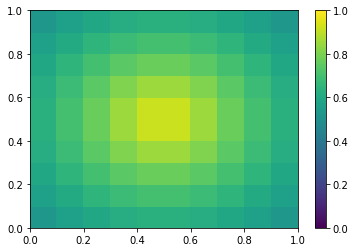

In [5]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda p: [np.exp(-((p[0]-0.5)**2+(p[1]-0.5)**2)**0.5)])
Draw(u0,mesh,v=[0.0,1.0])
print((mesh.getElNumber())**0.5+1)

In [6]:
u0_vec = u0.vec_export()
print("Mesh size",mesh.getSize(0)**2);

Mesh size 0.010000000000000002


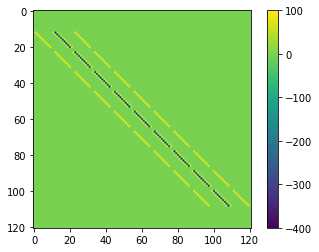

In [7]:
bc = BoundaryCondition("DIRICHLET",u0,Geo)
FD = FiniteDifference(mesh)
K = FD.LaplaceOp(bc)+FD.BoundaryOp(bc);
plt.imshow(spmat2npmat(K))
plt.colorbar()

In [8]:
DiffEq = LinearODEs(1);
DiffEq.setDomain(0,1)
DiffEq.setSolver("JACOBI",500);
DiffEq

Linear ODE of 1-th order defined on the interval (0.000000,1.000000)

In [9]:
M = spmat(K.Width(),K.Height())
N = spmat(K.Width(),K.Height())
N.empty()
DiffEq.setCoeff(0,lambda t : N);
DiffEq.setCoeff(1,lambda t : (-1)*K);
DiffEq.setCoeff(2,lambda t : M);
DiffEq.setIC([u0_vec])
[H, u] = DiffEq.Euler(0.001)

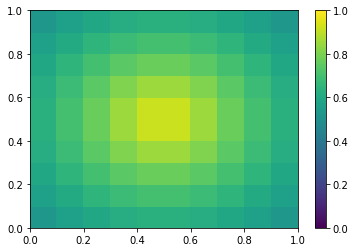

In [10]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[0])
Draw(ut,mesh,1,v=[0.0,1.0])

/home/umberto/Dropbox/Maths/Numerica/KAUST/Suite/Py/GUI/suiteGUI.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  return [plt.pcolor(Y,X,Z,vmin=v[0],vmax=v[1])];


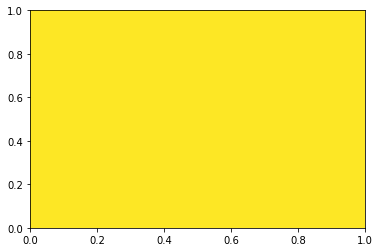

In [11]:
fig = plt.figure();
ims = []
for i in range(len(H)):
    ut.vec_import(u[i])
    ims.append(Figure(ut,mesh,v=[0.0,1.0]));

anim = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=1000);
HTML(anim.to_html5_video())

### Example 5 - Two Dimensional Heat Equation Image Processing

2304


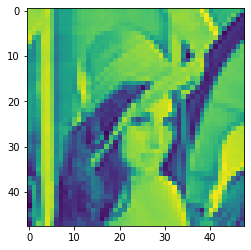

In [40]:
import matplotlib.pyplot as plt
I = plt.imread("lena48.png","L")
plt.imshow(I[:,:,0])
ImVec = I[:,:,0].reshape(48*48);
v = u0.vec_export();
v.from_Array(list(ImVec))
print(v.len())
u0.vec_import(v);

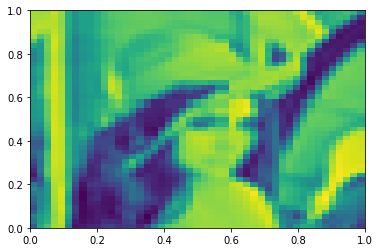

In [41]:
Draw(u0,mesh)
u0_vec = u0.vec_export()

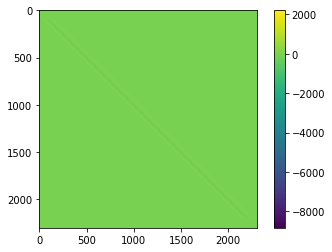

In [42]:
bc = BoundaryCondition("DIRICHLET",u0,Geo)
FD = FiniteDifference(mesh)
K = FD.LaplaceOp(bc);
plt.imshow(spmat2npmat(K))
plt.colorbar()
DiffEq = LinearODEs(1);
DiffEq.setDomain(0,0.1)
DiffEq.setSolver("JACOBI",500);
M = spmat(K.Width(),K.Height())
N = spmat(K.Width(),K.Height())
N.empty()
DiffEq.setCoeff(0,lambda t : N);
DiffEq.setCoeff(1,lambda t : (-1)*K);
DiffEq.setCoeff(2,lambda t : M);
DiffEq.setIC([u0_vec])
[H, u] = DiffEq.Euler(0.0002)

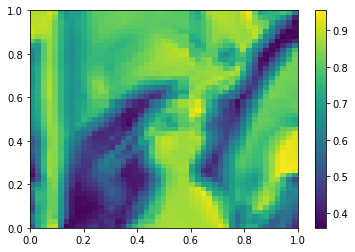

In [47]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[1])
Draw(ut,mesh,1)
plt.colorbar()

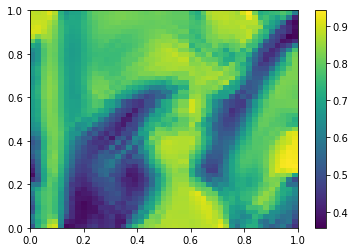

In [48]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[2])
Draw(ut,mesh,1)
plt.colorbar()

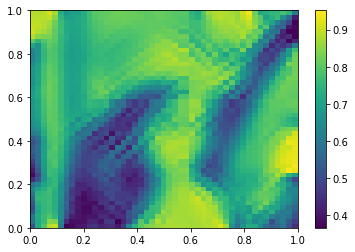

In [49]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[3])
Draw(ut,mesh,1)
plt.colorbar()

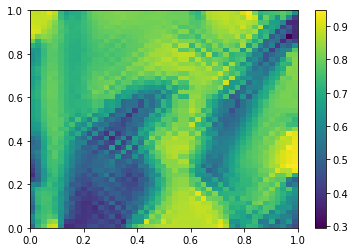

In [50]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[4])
Draw(ut,mesh,1)
plt.colorbar()